<a href="https://colab.research.google.com/github/olgasherbiena/KPI/blob/IDA/lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means Clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

## Generate Data

In [ ]:
data = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=1, random_state = 0)

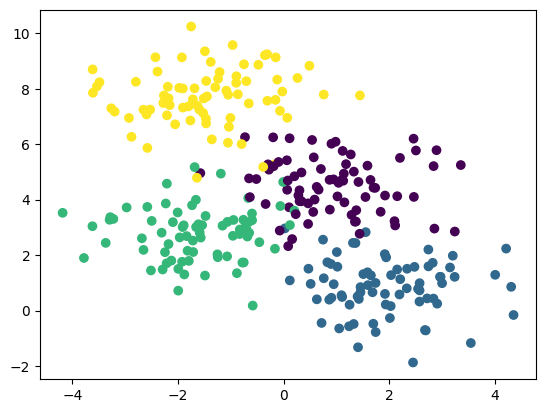

In [ ]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1])
plt.show()

In [ ]:
X = data[0]

## Elbow plot


Показує: як змінюється inertia (сума відстаней до центрів кластерів) при зростанні кількості кластерів k.

Потрібно для вибору оптимального k, де зменшення помилки стає незначним.

Ідея: шукаємо "лікоть" на графіку — точку, після якої виграш від додаткових кластерів мінімальний.

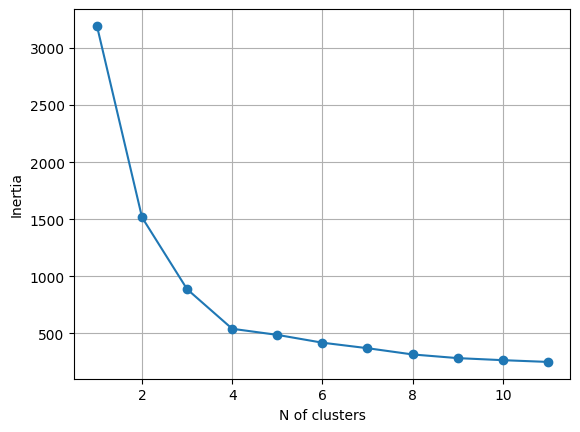

In [ ]:
Error =[]
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 12), Error, marker = 'o')
plt.xlabel('N of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

## Silhouette score

Показує: наскільки об’єкти близькі до свого кластера і віддалені від інших кластерів

Діапазон значень: від –1 до 1

Близько +1 → об’єкти добре згруповані

Близько 0 → кластери накладаються

Менше 0 → можливо, об’єкт віднесено не до свого кластера

Потрібно для: кількісної оцінки якості кластеризації при різних k

Ідея: обираємо таке k, де середній silhouette score найбільший

for more information see https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [ ]:
for i in range(2, 7):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, kmeans_labels)
    print("For n_clusters =", i, " silhouette average:", silhouette_avg)

For n_clusters = 2  silhouette average: 0.44846370096424437
For n_clusters = 3  silhouette average: 0.45712467817135366
For n_clusters = 4  silhouette average: 0.5011048917086873
For n_clusters = 5  silhouette average: 0.43726917513853447
For n_clusters = 6  silhouette average: 0.3808283781534481


### Clustering:
k = 3 - дає прийнятний результат (0.45) можна розглядати як простішу альтернативу.

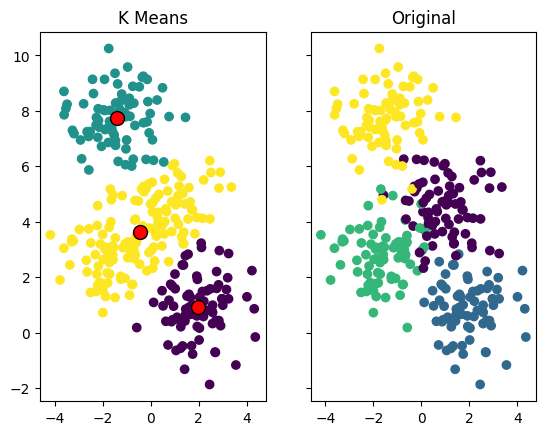

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data[0])
centers = kmeans.cluster_centers_
labels = kmeans.labels_

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=labels)
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1])
ax1.scatter(centers[:, 0], centers[:, 1], marker='o', color = 'red', s = 100, edgecolor='black')
plt.show()

k = 4

найвище значення (0.50) → це найбільш "природний" варіант

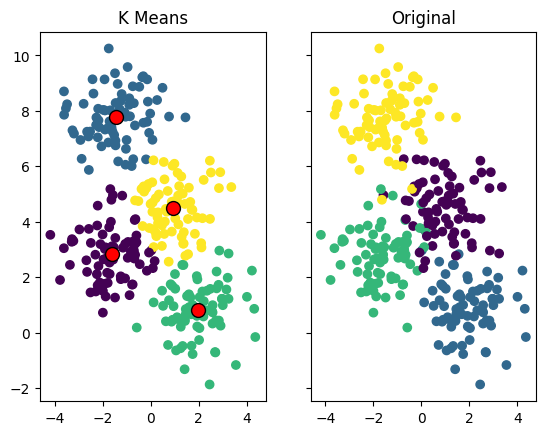

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data[0])
centers = kmeans.cluster_centers_
labels = kmeans.labels_

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=labels)
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1])
ax1.scatter(centers[:, 0], centers[:, 1], marker='o', color = 'red', s = 100, edgecolor='black')
plt.show()

k = 5

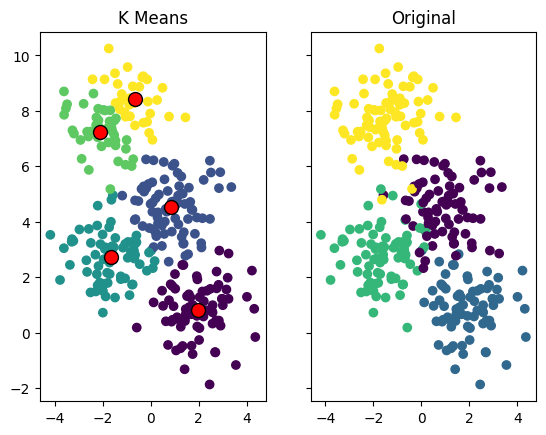

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data[0])
centers = kmeans.cluster_centers_
labels = kmeans.labels_

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=labels)
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1])
ax1.scatter(centers[:, 0], centers[:, 1], marker='o', color = 'red', s = 100, edgecolor='black')